In [185]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cycler import cycler
import matplotlib as mpl

In [186]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#D6E4FA', '#F6C8C6', '#FFF0C9', '#DCCFE2', '#D0E4D0', '#FEE3C8', '#DCCFE2', '#D0E4D0', '#FEE3C8', '#F6C8C6', '#FFF0C9', '#D6E4FA'])
figwidth = 25
figheight = 5

In [187]:
df = pd.read_csv('data/clean.csv')
len(df)

4143

In [188]:
df = df.drop_duplicates()
len(df)

3264

In [189]:
df = df[~df['genus'].isnull()]
len(df)

3263

In [190]:
df = df[~df['species'].isnull()]
len(df)

2837

In [191]:
df = df[~df['sequence'].isin(df['sequence'][df['sequence'].duplicated()])].sort_values('sequence')
len(df)

2800

In [192]:
def percent_of_df(n):
  return round(n/(len(df)/100), 2)

In [193]:
l = 20000
sequence_length_over_l = len(df[df['sequence'].str.len() > l])

print(f"{sequence_length_over_l} sequences with length below {l}")
print(f"{percent_of_df(sequence_length_over_l)}% of whole dataset with length over {l}")

159 sequences with length below 20000
5.68% of whole dataset with length over 20000


In [194]:
l = 150
sequence_length_over_l = len(df[df['sequence'].str.len() < l])

print(f"{sequence_length_over_l} sequences with length over {l}")
print(f"{percent_of_df(sequence_length_over_l)}% of whole dataset with length over {l}")

43 sequences with length over 150
1.54% of whole dataset with length over 150


In [195]:
l = 50
df_count = df.groupby(['genus'])['genus'].count().reset_index(name='count')
print(f"{len(df_count[df_count['count'] < l])} genus classes with fewer than {l} samples")

97 genus classes with fewer than 50 samples


In [196]:
l = 50
df_count = df.groupby(['species'])['species'].count().reset_index(name='count')
print(f"{len(df_count[df_count['count'] < l])} species classes with fewer than {l} samples")

226 species classes with fewer than 50 samples


In [197]:
print(f'{len(df.genus.unique())} unique genus classes')
print(f'{len(df.species.unique())} unique species classes')

108 unique genus classes
237 unique species classes


### Length distribution

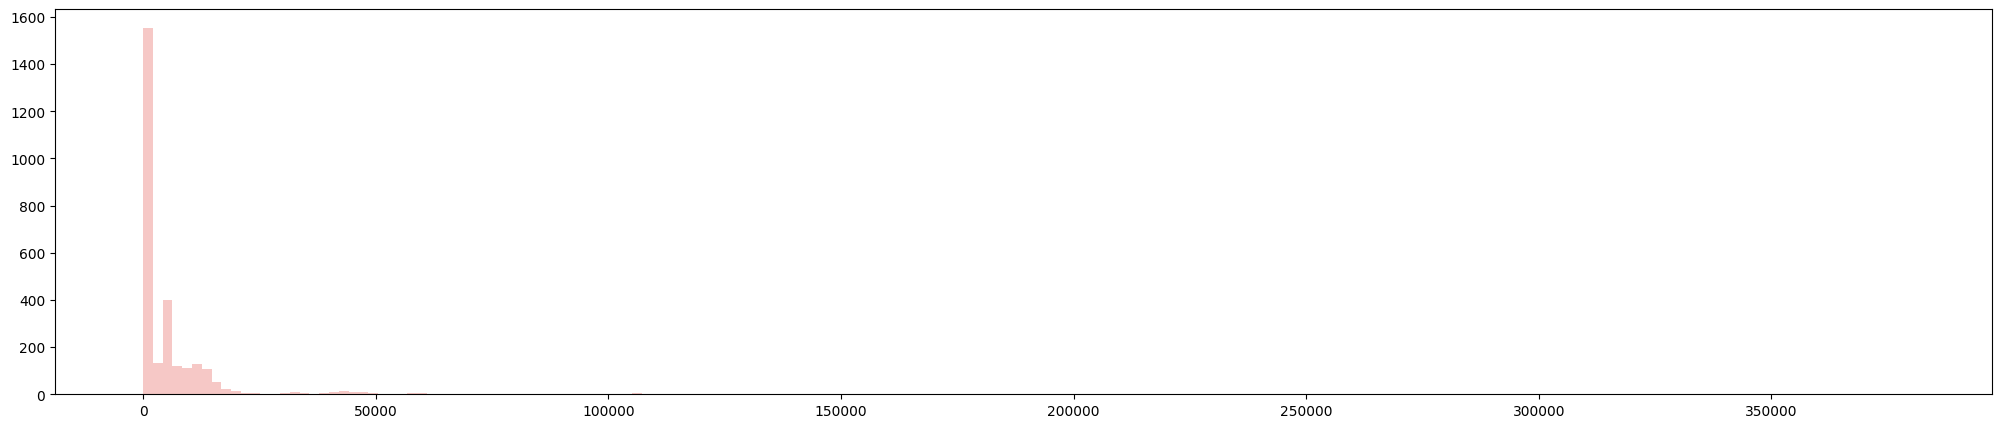

In [198]:
frequency = df['sequence'].str.len()

f = plt.figure()
f.set_figwidth(figwidth)
f.set_figheight(figheight)

plt.hist(frequency, bins = int(180/1), color='#F6C8C6')
plt.show()

### Genus distribution

<BarContainer object of 108 artists>

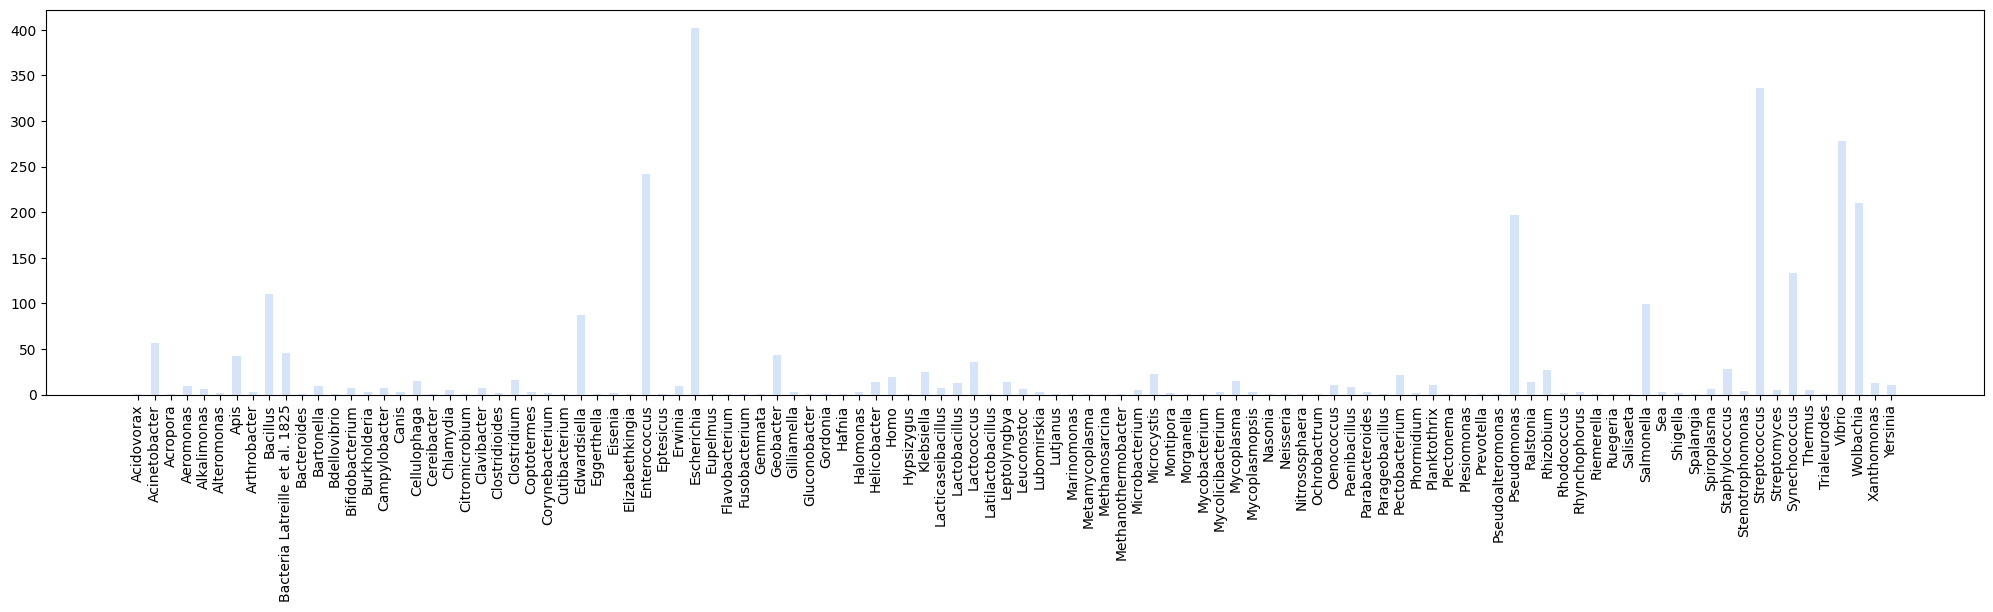

In [199]:
df2 = df.groupby('genus')['sequence'].aggregate([lambda x: x.str.len().min(), lambda x: x.str.len().max()]).reset_index()
df2 = df2.rename(columns={'<lambda_0>': 'min_sequence_length', '<lambda_1>': 'max_sequence_length'})
df2['count'] = df.groupby(['genus'])['genus'].count().reset_index(name='count')['count']

f = plt.figure()
f.set_figwidth(figwidth)
f.set_figheight(figheight)
plt.xticks(rotation=90)
plt.bar(df2['genus'], df2['count'], width=0.5)

### Species distribution

<BarContainer object of 237 artists>

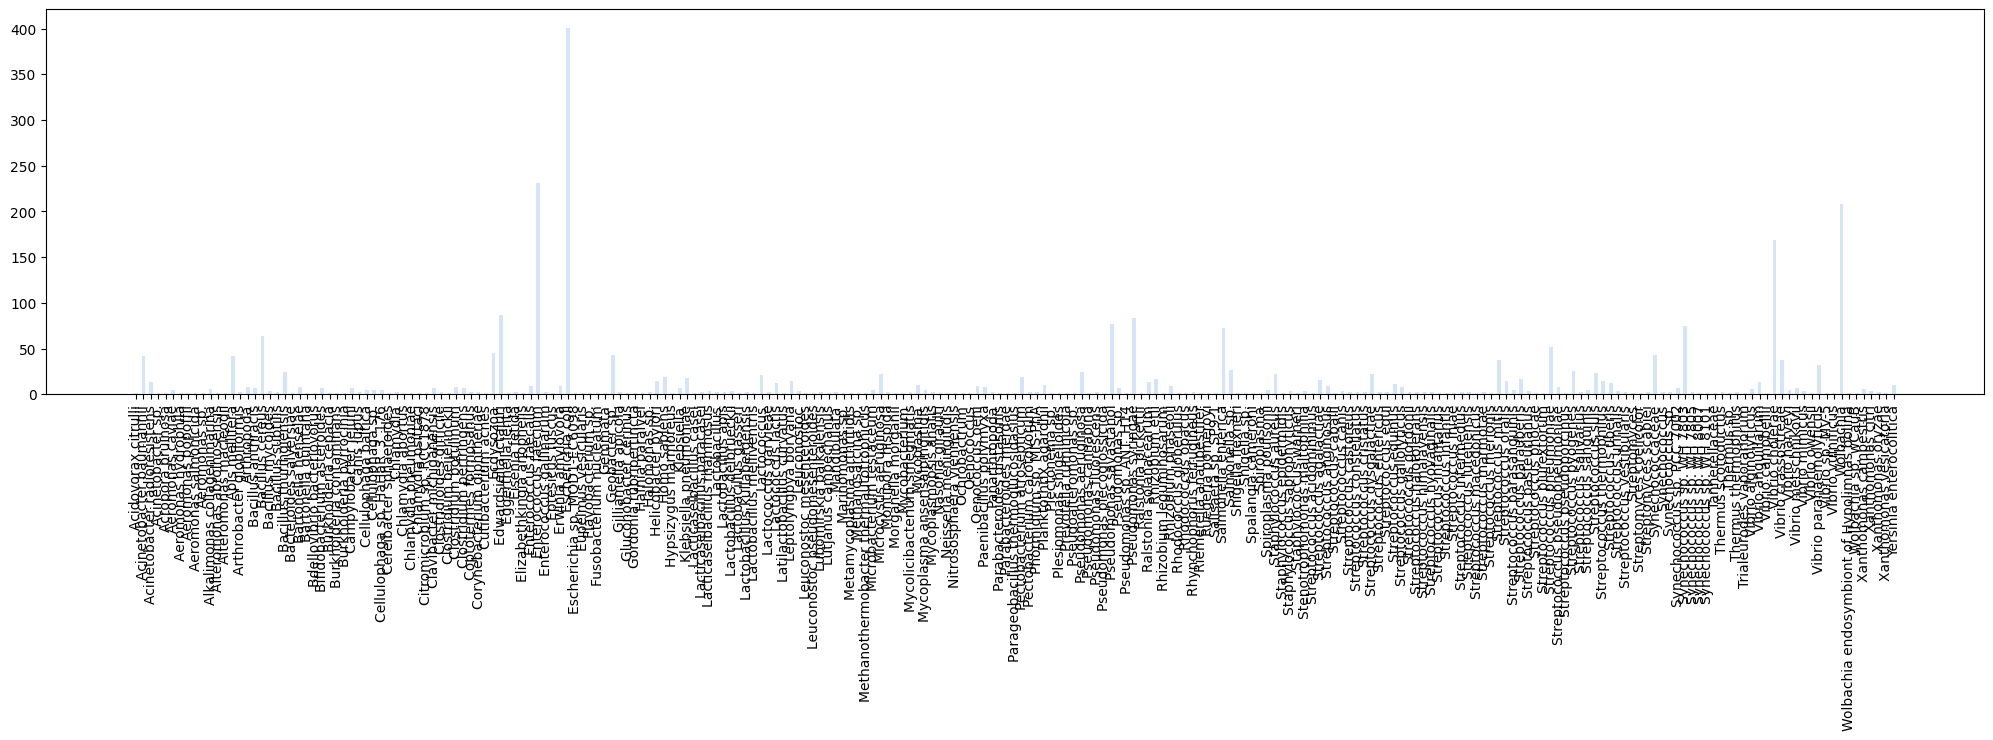

In [201]:
df2 = df.groupby('species')['sequence'].aggregate([lambda x: x.str.len().min(), lambda x: x.str.len().max()]).reset_index()
df2 = df2.rename(columns={'<lambda_0>': 'min_sequence_length', '<lambda_1>': 'max_sequence_length'})
df2['count'] = df.groupby(['species'])['species'].count().reset_index(name='count')['count']

f = plt.figure()
f.set_figwidth(figwidth)
f.set_figheight(figheight)
plt.xticks(rotation=90)
plt.bar(df2['species'], df2['count'], width=0.5)